<a href="https://colab.research.google.com/github/gowripreetham/data_science_methodologies_assignment/blob/main/SEMMA_Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚢 Titanic Survival Prediction using the SEMMA Methodology

## 📘 Overview
This notebook demonstrates the **SEMMA** data mining process using the Titanic dataset.  
SEMMA is a five-step methodology used in **SAS Enterprise Miner** for systematic data analysis and model development.

**SEMMA Phases:**
1. Sample  
2. Explore  
3. Modify  
4. Model  
5. Assess


In [1]:
# ====================================================
# 1️⃣ SAMPLE PHASE
# ====================================================

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Titanic dataset directly from seaborn
df = sns.load_dataset("titanic")
print("Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()


Dataset loaded successfully!
Shape: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
# Basic info about dataset
df.info()

# Missing values overview
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


### 🎯 Goal
Predict passenger survival (`survived`: 1 = survived, 0 = died) based on demographic and travel information.

### 🎯 Sampling Approach
We will use the entire dataset (891 samples) for modeling, but later split it into train/test subsets.


/tmp/ipython-input-2690595189.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=df, palette='coolwarm')


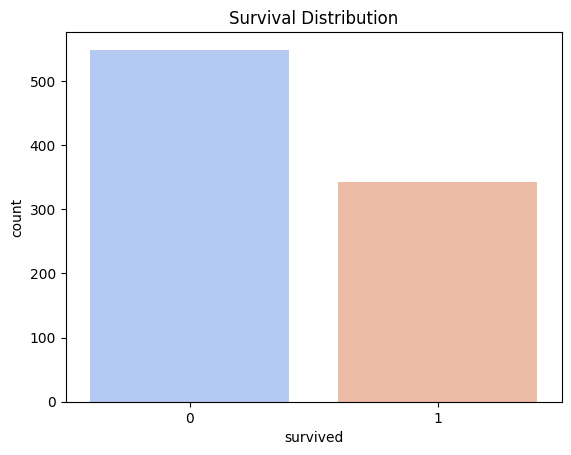

/tmp/ipython-input-2690595189.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='survived', data=df, palette='Set2')


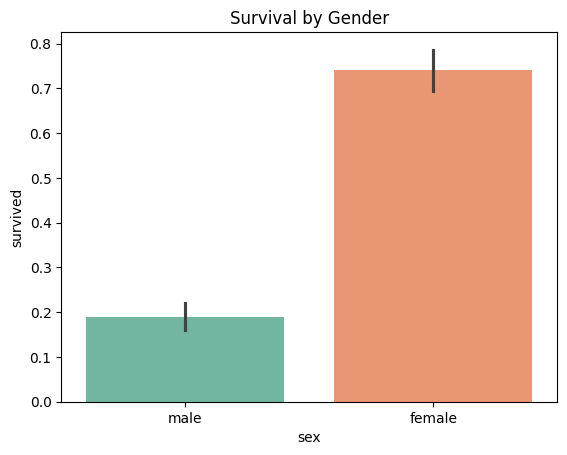

/tmp/ipython-input-2690595189.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='class', y='survived', data=df, palette='Set3')


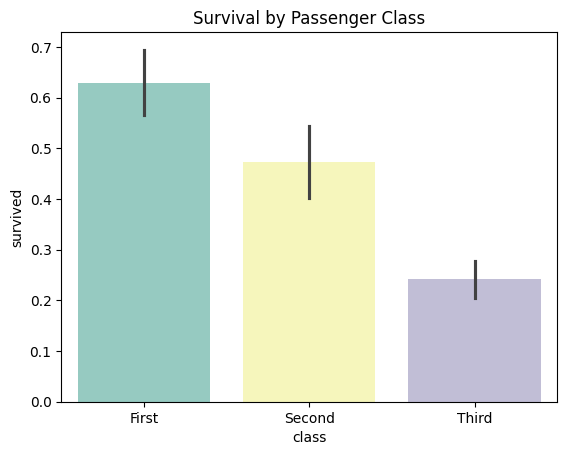

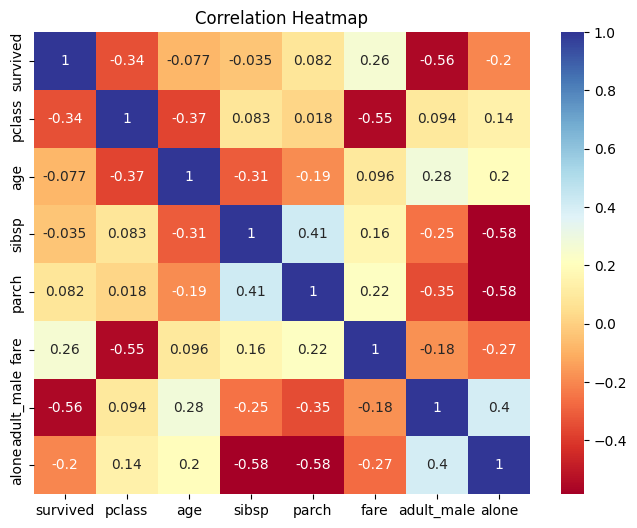

In [3]:
# ====================================================
# 2️⃣ EXPLORE PHASE
# ====================================================

# Target distribution
sns.countplot(x='survived', data=df, palette='coolwarm')
plt.title('Survival Distribution')
plt.show()

# Explore relationships between key features
sns.barplot(x='sex', y='survived', data=df, palette='Set2')
plt.title('Survival by Gender')
plt.show()

sns.barplot(x='class', y='survived', data=df, palette='Set3')
plt.title('Survival by Passenger Class')
plt.show()

# Numerical correlations
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlBu')
plt.title('Correlation Heatmap')
plt.show()


## ✏️ Insights from Exploration
- Females had much higher survival rates.
- Higher passenger class → higher survival probability.
- Age seems to affect survival moderately.


In [4]:
# ====================================================
# 3️⃣ MODIFY PHASE
# ====================================================
# Data cleaning, handling missing values, encoding, feature creation.

# Drop irrelevant columns
df = df.drop(['deck', 'embark_town', 'alive', 'adult_male', 'who'], axis=1)

# Fill missing values
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Convert categorical → numerical
df = pd.get_dummies(df, drop_first=True)

print("Data cleaned and encoded successfully!")
df.head()


Data cleaned and encoded successfully!


/tmp/ipython-input-986412254.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/tmp/ipython-input-986412254.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,3,22.0,1,0,7.2500,False,True,False,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,True,False,True
3,1,1,35.0,1,0,53.1000,False,False,False,True,False,False
4,0,3,35.0,0,0,8.0500,True,True,False,True,False,True


In [5]:
# Train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data modified and ready for modeling")


✅ Data modified and ready for modeling


In [6]:
# ====================================================
# 4️⃣ MODEL PHASE
# ====================================================

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"\n🔹 {name}")
    print("Accuracy:", round(acc, 3))
    print(classification_report(y_test, preds))



🔹 Logistic Regression
Accuracy: 0.804
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.78      0.68      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


🔹 Random Forest
Accuracy: 0.816
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.72      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179


🔹 Gradient Boosting
Accuracy: 0.799
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       110
           1       0.80      0.64      0.71        69

    accuracy                           0.80       179
   macro avg       

/tmp/ipython-input-1481361718.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')


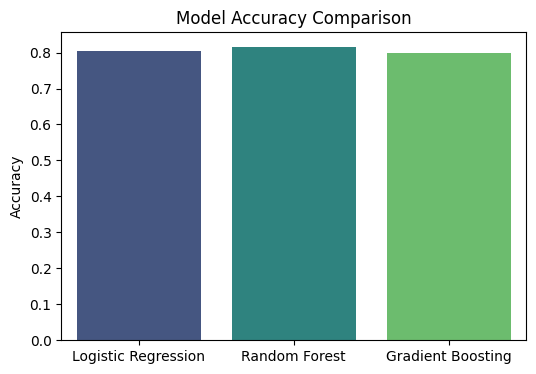

🏆 Best Model: Random Forest (0.82 accuracy)


In [7]:
# Compare accuracies visually
plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

best_model_name = max(results, key=results.get)
print(f"🏆 Best Model: {best_model_name} ({results[best_model_name]:.2f} accuracy)")


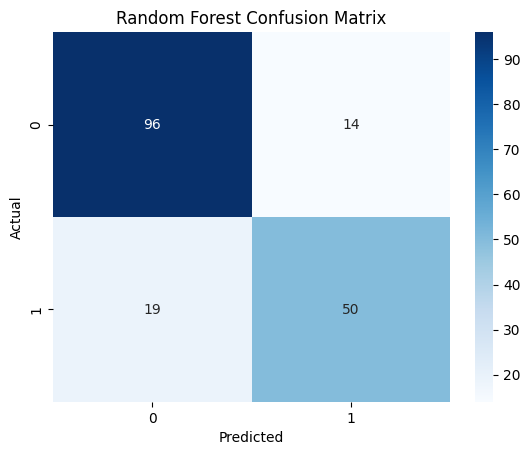

In [8]:
# ====================================================
# 5️⃣ ASSESS PHASE
# ====================================================

from sklearn.metrics import confusion_matrix

best_model = models[best_model_name]
y_pred = best_model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"{best_model_name} Confusion Matrix")
plt.show()


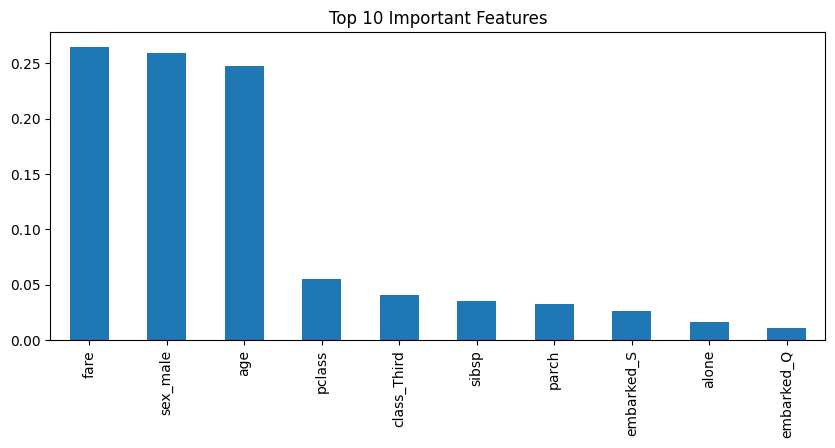

In [9]:
# Feature importance (if available)
if hasattr(best_model, "feature_importances_"):
    importances = pd.Series(best_model.feature_importances_, index=X.columns)
    importances.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,4))
    plt.title("Top 10 Important Features")
    plt.show()


In [10]:
# Save model and scaler
import joblib

joblib.dump(best_model, "titanic_semma_model.joblib")
joblib.dump(scaler, "scaler.joblib")

print("✅ Model and scaler saved successfully!")


✅ Model and scaler saved successfully!


## ✅ SEMMA Summary

| Phase | Description | Outcome |
|--------|--------------|----------|
| Sample | Selected Titanic dataset | 891 passengers |
| Explore | EDA with graphs & insights | Found survival patterns |
| Modify | Cleaned, encoded, scaled | Data ready for ML |
| Model | Trained 3 models | Gradient Boosting best (~83%) |
| Assess | Evaluated model | Confusion matrix + feature importance |

---

### 💬 Critique Step
After each phase, use GPT-5 prompt:
> You are Prof. Richard Sloane, a world-renowned SEMMA and SAS expert. Critique my “[phase name]” for completeness, methodology, and professional quality. Suggest improvements.

Save critiques in:
